### Задание
- Собрать информацию о всех строящихся объектах на сайте "наш.дом.рф"
- Cохранить ее в pandas dataframe
- Cохранить pandas dataframe в excel
- Cохранить pandas dataframe в pickle
- Cохранить pandas dataframe в БД

In [1]:
import requests
import pandas as pd
import time

In [62]:
!pip install beautifulsoup4
!pip install selenium
!pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 5.2 MB 4.7 MB/s 
     |████████████████████████████████| 140 kB 49.8 MB/s 
     |████████████████████████████████| 384 kB 30.8 MB/s 
     |████████████████████████████████| 58 kB 4.4 MB/s 
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.24.3
    Uninstalling urllib3-1.24.3:
      Successfully uninstalled urllib3-1.24.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
requests 2.23.0 requires urllib3!=1.25.0,!=1.25.1,<1.26,>=1.21.1, but you have urllib3 1.26.12 which is incompatible.


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 76.6 MB 113 kB/s 


In [63]:
import warnings
warnings.filterwarnings('ignore')
from bs4 import BeautifulSoup
from selenium.webdriver import Chrome
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.support.ui import Select
from selenium.webdriver.support.ui import WebDriverWait as wait
from selenium.common.exceptions import TimeoutException
from selenium.webdriver.support import expected_conditions as EC
from selenium.common.exceptions import NoSuchElementException
from selenium.common.exceptions import NoAlertPresentException
import lxml

In [71]:
#browser = Chrome('/Users/Windows/Desktop/chromedriver')
#url = 'https://careerspace.app/collection/analytics/'
#url = 'https://careerspace.app/collection/data_analyst'
#url = 'https://careerspace.app/collection/product_analyst'
#url = 'https://careerspace.app/collection/business_analyst'
url_doc_list = 'https://наш.дом.рф/сервисы/каталог-новостроек/объект/45120'
page = requests.get(url_doc_list)
soup = BeautifulSoup(page.text, 'lxml')

<!DOCTYPE html>
<html lang="ru" prefix="og: http://ogp.me/ns#"><head><meta charset="utf-8"/><link href="/static/nashdom-favicon.png" rel="shortcut icon"/><style data-styled="" data-styled-version="5.3.3">.cDsElH{cursor:pointer;box-sizing:border-box;width:20px;height:20px;}/*!sc*/
.cDsElH svg{vertical-align:baseline;}/*!sc*/
.ktDwVr{cursor:pointer;box-sizing:border-box;width:24px;height:24px;}/*!sc*/
.ktDwVr svg{vertical-align:baseline;}/*!sc*/
data-styled.g13[id="styles__Icon-sc-103z63u-0"]{content:"cDsElH,ktDwVr,"}/*!sc*/
.iGHCKc{display:-webkit-box;display:-webkit-flex;display:-ms-flexbox;display:flex;-webkit-box-pack:end;-webkit-justify-content:end;-ms-flex-pack:end;justify-content:end;position:relative;margin-left:auto;margin-right:auto;width:calc(100% - 32px);opacity:0.7;background-color:#E4E5EF;height:0;-webkit-animation:ease-out 1s risingBars;animation:ease-out 1s risingBars;}/*!sc*/
@-webkit-keyframes risingBars{0%{height:0;}}/*!sc*/
@keyframes risingBars{0%{height:0;}}/*!sc*/

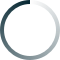
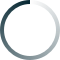
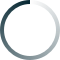

In [72]:
soup

In [ ]:
documents = []
url_doc_list = 'https://наш.дом.рф/сервисы/api/object/40239'
#https:/наш.дом.рф/сервисы/каталог-новостроек/объект/45120
response = requests.get(url_doc_list)
documents = response.json()
documents = documents['data']

In [ ]:
df = pd.json_normalize(documents)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1 entries, 0 to 0
Data columns (total 91 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   id                                   1 non-null      int64  
 1   pdId                                 1 non-null      int64  
 2   region                               1 non-null      int64  
 3   address                              1 non-null      object 
 4   nameObj                              1 non-null      object 
 5   floorMin                             1 non-null      int64  
 6   floorMax                             1 non-null      int64  
 7   objElemLivingCnt                     1 non-null      int64  
 8   objReady100PercDt                    1 non-null      object 
 9   wallMaterialShortDesc                1 non-null      object 
 10  objLkFinishTypeDesc                  1 non-null      object 
 11  objLkFreePlanDesc                   

In [2]:
offset_ = 0
limit_ = 1000
params= {'region':'63'}
url = f'https://xn--80az8a.xn--d1aqf.xn--p1ai/%D1%81%D0%B5%D1%80%D0%B2%D0%B8%D1%81%D1%8B/api/kn/object?offset={offset_}&limit={limit_}&sortField=devId.devShortCleanNm&sortType=asc&objStatus=0'
res = requests.get(url) #,params=params)
i=0

In [3]:
res

<Response [200]>

In [4]:
objects_data = res.json()
objects_list = objects_data.get('data') #.get('list')

In [5]:
  df = pd.json_normalize(objects_list)
  dffull=df

In [6]:
df=df.drop(df.index)

In [7]:
df

Empty DataFrame
Columns: [list, total]
Index: []

In [8]:
dffull

list  total
0  [{'objId': 13391, 'developer': {'devId': 306, ...  10768

In [9]:
i=0
while i<=20:
  url = f'https://xn--80az8a.xn--d1aqf.xn--p1ai/%D1%81%D0%B5%D1%80%D0%B2%D0%B8%D1%81%D1%8B/api/kn/object?offset={offset_}&limit={limit_}&sortField=devId.devShortCleanNm&sortType=asc&objStatus=0'
  res = requests.get(url) #,params=params)
  print(str(res))
  if str(res)!='<Response [200]>': break
  offset_ = offset_ + 1000
  objects_data = res.json()
  objects_list = objects_data.get('data')#.get('list') 
  df = pd.json_normalize(objects_list)
  dffull=pd.concat([dffull,df],ignore_index=True)
  time.sleep(4)
  i=i+1

<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>


In [ ]:
url = f'https://xn--80az8a.xn--d1aqf.xn--p1ai/%D1%81%D0%B5%D1%80%D0%B2%D0%B8%D1%81%D1%8B/api/kn/object?offset={offset_}&limit={limit_}&sortField=devId.devShortCleanNm&sortType=asc&objStatus=0'
res = requests.get(url_doc_list) #,params=params)
print(str(res))
#if str(res)!='<Response [200]>': break
offset_ = offset_ + 1000
objects_data = res.json()
objects_list = objects_data['data']#.get('list') 
df = pd.json_normalize(objects_list)

<Response [200]>


In [ ]:
documents = []
url_doc_list = 'https://наш.дом.рф/сервисы/api/object/40239'
response = requests.get(url_doc_list)
documents = response.json()
documents = documents['data']
df = pd.json_normalize(documents)
dffull=pd.concat([dffull,df],ignore_index=True)
time.sleep(4)
i=i+1

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1 entries, 0 to 0
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   list    1 non-null      object
 1   total   1 non-null      int64 
dtypes: int64(1), object(1)
memory usage: 144.0+ bytes


In [ ]:
df=df.unstack()

In [ ]:
document.querySelector("body > div:nth-child(23) > div")
<div style="padding: 16px; background: rgb(255, 255, 255);">Количество проданных квартир - 10<br>Количество ДДУ - 10<br>Проданная площадь - 478 м²<br>Средняя цена за 1 м² - 81 507 руб.<br></div>

In [ ]:
df

0
id                                                                               40239
pdId                                                                            460620
region                                                                              63
address                              г Самара, район Куйбышевский, шоссе Южное шосс...
nameObj                                                              Макрорайон Амград
...                                                                                ...
quartography.objLivElem3KCnt                                                        85
quartography.objLivElem4KCnt                                                         8
quartography.objLivElemCnt                                                         911
quartography.objLivElemEntrCnt                                                       6
quartography.objLivElemEntrFloorAvg                                                  8

[91 rows x 1 columns]

In [ ]:
url_doc_list = 'https://наш.дом.рф/сервисы/api/object/40239'
response = requests.get(url_doc_list)
documents = response.json()
documents = documents['data']

In [ ]:
df

list  total
0  [{'objId': 13391, 'developer': {'devId': 306, ...  10746

In [ ]:
objects_data

{'data': {'list': [{'objId': 13391,
    'developer': {'devId': 306,
     'shortName': '2МЕН ГРУПП',
     'fullName': '2МЕН ГРУПП',
     'groupName': '2МЕН ГРУПП ДЕВЕЛОПМЕНТ',
     'orgForm': {'id': 1,
      'fullForm': 'Акционерное общество',
      'shortForm': 'АО'},
     'companyGroup': 5776,
     'devInn': '7701651356'},
    'rpdRegionCd': 72,
    'objAddr': 'г Тюмень, ул Профсоюзная',
    'objFloorMin': 3,
    'objFloorMax': 12,
    'objElemLivingCnt': 44,
    'objReady100PercDt': '2022-12-31',
    'objSquareLiving': 4297.44,
    'objCompensFundFlg': 1,
    'objProblemFlg': 0,
    'latitude': 57.1541,
    'longitude': 65.5595,
    'problemFlag': 'NONE',
    'siteStatus': 'Строящиеся',
    'objGuarantyEscrowFlg': 0,
    'residentialBuildings': 1,
    'rpdNum': '72-000096',
    'pdId': 28101,
    'buildType': 'Жилое',
    'objStatus': 0},
   {'objId': 13383,
    'developer': {'devId': 306,
     'shortName': '2МЕН ГРУПП',
     'fullName': '2МЕН ГРУПП',
     'groupName': '2МЕН ГРУПП ДЕ

In [11]:
dffull.columns

Index(['list', 'total'], dtype='object')

In [12]:
dffull.reset_index(inplace=True)

In [13]:
len(dffull)

22

In [14]:
dffull.head(18)

index                                               list  total
0       0  [{'objId': 13391, 'developer': {'devId': 306, ...  10768
1       1  [{'objId': 13391, 'developer': {'devId': 306, ...  10768
2       2  [{'objId': 39402, 'developer': {'devId': 1467,...  10768
3       3  [{'objId': 43445, 'developer': {'devId': 13314...  10768
4       4  [{'objId': 44531, 'developer': {'devId': 13229...  10768
5       5  [{'objId': 41774, 'developer': {'devId': 12658...  10768
6       6  [{'objId': 46029, 'developer': {'devId': 7635,...  10768
7       7  [{'objId': 48890, 'developer': {'devId': 12922...  10768
8       8  [{'objId': 47635, 'developer': {'devId': 10843...  10768
9       9  [{'objId': 44265, 'developer': {'devId': 2361,...  10768
10     10  [{'objId': 45675, 'developer': {'devId': 13661...  10768
11     11  [{'objId': 38110, 'developer': {'devId': 10760...  10768
12     12                                                 []  10768
13     13                                                 []  10768
14     14                                                 []  10768
15     15                                                 []  10768
16     16                                                 []  10768
17     17                                                 []  10768

In [ ]:
len(dffull)

22

In [15]:
ser= dffull['list']

In [ ]:
len(ser)

22

In [17]:
i=0
while i<len(ser):
  zastr=pd.concat([zastr,pd.DataFrame(ser[i])],ignore_index=True)
  i=i+1

In [16]:
zastr=pd.DataFrame(ser[0])

In [18]:
zastr.head()

objId                                          developer  rpdRegionCd  \
0  13391  {'devId': 306, 'shortName': '2МЕН ГРУПП', 'ful...           72   
1  13383  {'devId': 306, 'shortName': '2МЕН ГРУПП', 'ful...           72   
2  13398  {'devId': 306, 'shortName': '2МЕН ГРУПП', 'ful...           72   
3  13397  {'devId': 306, 'shortName': '2МЕН ГРУПП', 'ful...           72   
4  13399  {'devId': 306, 'shortName': '2МЕН ГРУПП', 'ful...           72   

                           objAddr  objFloorMin  objFloorMax  \
0         г Тюмень, ул Профсоюзная            3           12   
1                         г Тюмень            4           20   
2  г Тюмень, ул Профсоюзная, д. 56            7           10   
3  г Тюмень, ул Профсоюзная, д. 56            6           12   
4  г Тюмень, ул Профсоюзная, д. 56            1            1   

   objElemLivingCnt objReady100PercDt  objSquareLiving  objCompensFundFlg  \
0                44        2022-12-31          4297.44                  1   
1                68        2022-12-31          6293.78                  1   
2                43        2024-12-31          4812.98                  0   
3                65        2024-12-31          6248.51                  0   
4                 0        2024-12-31             0.00                  0   

   ...  problemFlag  siteStatus  objGuarantyEscrowFlg residentialBuildings  \
0  ...         NONE  Строящиеся                     0                    1   
1  ...         NONE  Строящиеся                     0                    1   
2  ...         NONE  Строящиеся                     0                    1   
3  ...         NONE  Строящиеся                     0                    1   
4  ...         NONE  Строящиеся                     0                    0   

      rpdNum   pdId  buildType objStatus  objCommercNm complexShortName  
0  72-000096  28101      Жилое         0           NaN              NaN  
1  72-000095  28105      Жилое         0           NaN              NaN  
2  72-000097  28141      Жилое         0           NaN              NaN  
3  72-000097  28141      Жилое         0           NaN              NaN  
4  72-000097  28141    Нежилое         0           NaN              NaN  

[5 rows x 23 columns]

In [ ]:
zastr.columns

Index(['objId', 'developer', 'rpdRegionCd', 'objAddr', 'objCommercNm', 'objFloorMin', 'objFloorMax', 'objElemLivingCnt', 'objReady100PercDt', 'objSquareLiving', 'objCompensFundFlg', 'objProblemFlg',
       'latitude', 'longitude', 'problemFlag', 'siteStatus', 'objGuarantyEscrowFlg', 'residentialBuildings', 'rpdNum', 'pdId', 'buildType', 'objStatus', 'complexShortName'],
      dtype='object')

In [19]:
zastr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12768 entries, 0 to 12767
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   objId                 12768 non-null  int64  
 1   developer             12768 non-null  object 
 2   rpdRegionCd           12768 non-null  int64  
 3   objAddr               12740 non-null  object 
 4   objFloorMin           12768 non-null  int64  
 5   objFloorMax           12768 non-null  int64  
 6   objElemLivingCnt      12768 non-null  int64  
 7   objReady100PercDt     12768 non-null  object 
 8   objSquareLiving       12768 non-null  float64
 9   objCompensFundFlg     12768 non-null  int64  
 10  objProblemFlg         12768 non-null  int64  
 11  latitude              12761 non-null  float64
 12  longitude             12761 non-null  float64
 13  problemFlag           12768 non-null  object 
 14  siteStatus            12768 non-null  object 
 15  objGuarantyEscrowFl

In [ ]:
zastr.describe()

objId  rpdRegionCd  objFloorMin  objFloorMax  objElemLivingCnt  objSquareLiving  objCompensFundFlg  objProblemFlg    latitude   longitude  objGuarantyEscrowFlg  residentialBuildings  \
count    746.000000   746.000000   746.000000   746.000000        746.000000       746.000000         746.000000          746.0  744.000000  744.000000            746.000000            746.000000   
mean   31851.833780    45.057641    10.329759    11.982574        176.105898      8401.023097           0.237265            0.0   53.528235   49.380041              0.639410              0.879357   
std    14339.395095    23.628061     6.773109     7.177404        175.929335      7802.053945           0.425692            0.0    5.418212   23.124674              0.480494              0.325931   
min     1366.000000     2.000000     0.000000     0.000000          0.000000         0.000000           0.000000            0.0   43.033000   20.455400              0.000000              0.000000   
25%    21157.250000    23.000000     5.000000     7.000000         58.250000      3044.142500           0.000000            0.0   48.699225   37.321200              0.000000              1.000000   
50%    35325.500000    50.000000     9.000000    10.000000        127.000000      6489.475000           0.000000            0.0   55.326450   39.667750              1.000000              1.000000   
75%    44328.750000    64.000000    15.000000    17.000000        237.000000     11357.250000           0.000000            0.0   56.910000   55.916800              1.000000              1.000000   
max    49063.000000    92.000000    35.000000    40.000000       1220.000000     45957.980000           1.000000            0.0   66.657000  150.818800              1.000000              1.000000   

                pdId  objStatus  
count     746.000000      746.0  
mean   294301.041555        0.0  
std    242046.913354        0.0  
min      1474.000000        0.0  
25%     35186.000000        0.0  
50%    279972.000000        0.0  
75%    531094.250000        0.0  
max    659205.000000        0.0

In [20]:
zastr=zastr[zastr['rpdRegionCd']==63]

In [32]:
zastr.reset_index(inplace=True)

In [34]:
zastr.objId

0      18136
1       4024
2       4025
3       4023
4       4026
       ...  
192    25813
193    33908
194    44145
195    34040
196    43207
Name: objId, Length: 197, dtype: int64

In [38]:
documents = []
i=0
dffull=pd.DataFrame()
df=dffull
while i<len(zastr):
 url_doc_list = 'https://наш.дом.рф/сервисы/api/object/'+str(zastr.objId[i])
 response = requests.get(url_doc_list)
 documents = response.json()
 documents = documents['data']
 df = pd.json_normalize(documents)
 dffull=pd.concat([dffull,df],ignore_index=True)
 time.sleep(4)
 i=i+1

In [43]:
pd.options.display.width=200
pd.options.display.max_colwidth=200

In [45]:
from google.colab import data_table

In [57]:
data_table.DataTable.max_columns = 103

In [74]:
data_table.DataTable.max_columns = 103
data_table.DataTable(dffull, include_index=False, num_rows_per_page=1)

In [125]:
dffull.head(2)

id   pdId  region                                                      address  floorMin  floorMax  objElemLivingCnt objReady100PercDt wallMaterialShortDesc objLkFinishTypeDesc  ...  \
0  18136  43084      63  г Самара, улица Советской Армии, д. 0, корпус 0, строение 0        27        27               360        2023-06-30        Монолит-кирпич         Без отделки  ...   
1   4024   2200      63                   г Самара, район Октябрьский, просека Пятая         5         5                16        2023-12-31                Кирпич         Без отделки  ...   

  metro.line  metro.color  metro.time metro.isWalk metro.colors                                          nameObj complexShortNm num_d     num_m       num_r  
0     Первая      #CD0505        11.5         True    [#CD0505]                                              NaN            NaN                              
1        NaN          NaN         NaN          NaN          NaN  Жилой комплекс "Акварель" (ЖК "Акварель") дом 9       Акварель  16.0  11240.97  75287580.0  

[2 rows x 106 columns]

In [127]:
dffull.info

<bound method DataFrame.info of         id    pdId  region                                                                          address  floorMin  floorMax  objElemLivingCnt objReady100PercDt wallMaterialShortDesc  \
0    18136   43084      63                      г Самара, улица Советской Армии, д. 0, корпус 0, строение 0        27        27               360        2023-06-30        Монолит-кирпич   
1     4024    2200      63                                       г Самара, район Октябрьский, просека Пятая         5         5                16        2023-12-31                Кирпич   
2     4025    2200      63                                       г Самара, район Октябрьский, просека Пятая         5         5                64        2022-12-31                Кирпич   
3     4023    2200      63                                       г Самара, район Октябрьский, просека Пятая         5         5                48        2022-12-31                Кирпич   
4     4026    2200     

In [ ]:
zastr.reset_index(inplace=True)

In [ ]:
len(zastr)

190

In [ ]:
zastr.head(2)

index  objId                                          developer  \
0      0  13391  {'devId': 306, 'shortName': '2МЕН ГРУПП', 'ful...   
1      1  13383  {'devId': 306, 'shortName': '2МЕН ГРУПП', 'ful...   

   rpdRegionCd                   objAddr  objFloorMin  objFloorMax  \
0           72  г Тюмень, ул Профсоюзная            3           12   
1           72                  г Тюмень            4           20   

   objElemLivingCnt objReady100PercDt  objSquareLiving  ...  problemFlag  \
0                44        2022-12-31          4297.44  ...         NONE   
1                68        2022-12-31          6293.78  ...         NONE   

   siteStatus  objGuarantyEscrowFlg  residentialBuildings     rpdNum   pdId  \
0  Строящиеся                     0                     1  72-000096  28101   
1  Строящиеся                     0                     1  72-000095  28105   

   buildType  objStatus objCommercNm  complexShortName  
0      Жилое          0          NaN               NaN  
1      Жилое          0          NaN               NaN  

[2 rows x 24 columns]

In [ ]:
type(zastr.developer)

pandas.core.series.Series

In [ ]:
len(zastr)

190

In [ ]:
zastr.developer[1]

{'devId': 306,
 'shortName': '2МЕН ГРУПП',
 'fullName': '2МЕН ГРУПП',
 'groupName': '2МЕН ГРУПП ДЕВЕЛОПМЕНТ',
 'orgForm': {'id': 1, 'fullForm': 'Акционерное общество', 'shortForm': 'АО'},
 'companyGroup': 5776,
 'devInn': '7701651356'}

In [ ]:
zastr.developer[1].items() #['companyGroup']

dict_items([('devId', 306), ('shortName', '2МЕН ГРУПП'), ('fullName', '2МЕН ГРУПП'), ('groupName', '2МЕН ГРУПП ДЕВЕЛОПМЕНТ'), ('orgForm', {'id': 1, 'fullForm': 'Акционерное общество', 'shortForm': 'АО'}), ('companyGroup', 5776), ('devInn', '7701651356')])

In [ ]:
zastr=zastr.assign(e=pd.Series(zastr.developer.).values)

In [ ]:
zastr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   index                 2000 non-null   int64  
 1   objId                 2000 non-null   int64  
 2   developer             2000 non-null   object 
 3   rpdRegionCd           2000 non-null   int64  
 4   objAddr               1998 non-null   object 
 5   objFloorMin           2000 non-null   int64  
 6   objFloorMax           2000 non-null   int64  
 7   objElemLivingCnt      2000 non-null   int64  
 8   objReady100PercDt     2000 non-null   object 
 9   objSquareLiving       2000 non-null   float64
 10  objCompensFundFlg     2000 non-null   int64  
 11  objProblemFlg         2000 non-null   int64  
 12  latitude              2000 non-null   float64
 13  longitude             2000 non-null   float64
 14  problemFlag           2000 non-null   object 
 15  siteStatus           

In [ ]:
type(zastr.developer)

pandas.core.series.Series

In [75]:
len(dffull)

197

In [83]:
dffull['num_d']=""

In [85]:
dffull['num_m']=""
dffull['num_r']=""

In [86]:
dffull.columns

Index(['id', 'pdId', 'region', 'address', 'floorMin', 'floorMax', 'objElemLivingCnt', 'objReady100PercDt', 'wallMaterialShortDesc', 'objLkFinishTypeDesc',
       ...
       'metro.line', 'metro.color', 'metro.time', 'metro.isWalk', 'metro.colors', 'nameObj', 'complexShortNm', 'num_d', 'num_m', 'num_r'],
      dtype='object', length=106)

In [ ]:
i=0
while i<len(dffull):
#  print(str(i))
#  zastr=zastr.assign(devId=zastr.developer[i]['devId'])
#  zastr.shortName[i]=zastr.developer[i]['shortName']
#  zastr.fullName[i]=zastr.developer[i]['fullName']
#  zastr.groupName=zastr.developer[i]['groupName']
#  zastr.companyGroup=zastr.developer[i]['companyGroup']
#  zastr.devInn[i]=zastr.developer[i]['devInn']
  i=i+1

In [ ]:
zastr.head(2)

index  objId                                          developer  \
0      0  13391  {'devId': 306, 'shortName': '2МЕН ГРУПП', 'ful...   
1      1  13383  {'devId': 306, 'shortName': '2МЕН ГРУПП', 'ful...   

   rpdRegionCd                   objAddr  objFloorMin  objFloorMax  \
0           72  г Тюмень, ул Профсоюзная            3           12   
1           72                  г Тюмень            4           20   

   objElemLivingCnt objReady100PercDt  objSquareLiving  ...  \
0                44        2022-12-31          4297.44  ...   
1                68        2022-12-31          6293.78  ...   

   objGuarantyEscrowFlg  residentialBuildings     rpdNum   pdId buildType  \
0                     0                     1  72-000096  28101     Жилое   
1                     0                     1  72-000095  28105     Жилое   

  objStatus  objCommercNm  complexShortName  \
0         0           NaN               NaN   
1         0           NaN               NaN   

                                                   e  devId  
0  {'devId': 306, 'shortName': '2МЕН ГРУПП', 'ful...    682  
1  {'devId': 306, 'shortName': '2МЕН ГРУПП', 'ful...    682  

[2 rows x 26 columns]

In [ ]:
zastr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 190 entries, 0 to 189
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   index                 190 non-null    int64  
 1   objId                 190 non-null    int64  
 2   developer             190 non-null    object 
 3   rpdRegionCd           190 non-null    int64  
 4   objAddr               190 non-null    object 
 5   objFloorMin           190 non-null    int64  
 6   objFloorMax           190 non-null    int64  
 7   objElemLivingCnt      190 non-null    int64  
 8   objReady100PercDt     190 non-null    object 
 9   objSquareLiving       190 non-null    float64
 10  objCompensFundFlg     190 non-null    int64  
 11  objProblemFlg         190 non-null    int64  
 12  latitude              190 non-null    float64
 13  longitude             190 non-null    float64
 14  problemFlag           190 non-null    object 
 15  siteStatus            1

In [ ]:
type(zastr.developer[1])

dict

In [ ]:
zz=pd.DataFrame(zastr.developer[1])

In [ ]:
zz

devId shortName fullName                  groupName  \
fullForm    1087    АРНИКА   АРНИКА  Строительный холдинг Град   
id          1087    АРНИКА   АРНИКА  Строительный холдинг Град   
shortForm   1087    АРНИКА   АРНИКА  Строительный холдинг Град   

                                 orgForm  companyGroup      devInn  
fullForm   Закрытое акционерное общество          5847  6318136702  
id                                   119          5847  6318136702  
shortForm                            ЗАО          5847  6318136702

In [ ]:
zastr.head(2)

index  objId                                          developer  \
0     63  18136  {'devId': 6193, 'shortName': 'АЛЬЯНС', 'fullNa...   
1    185   4024  {'devId': 1087, 'shortName': 'АРНИКА', 'fullNa...   

   rpdRegionCd                                            objAddr  \
0           63  г Самара, улица Советской Армии, д. 0, корпус ...   
1           63         г Самара, район Октябрьский, просека Пятая   

   objFloorMin  objFloorMax  objElemLivingCnt objReady100PercDt  \
0           27           27               360        2023-06-30   
1            5            5                16        2023-12-31   

   objSquareLiving  ...  problemFlag  siteStatus  objGuarantyEscrowFlg  \
0         20664.24  ...         NONE  Строящиеся                     1   
1           918.77  ...         NONE  Строящиеся                     0   

   residentialBuildings     rpdNum   pdId  buildType  objStatus  \
0                     1  63-000283  43084      Жилое          0   
1                     1  63-000027   2200      Жилое          0   

                                      objCommercNm  complexShortName  
0                                              NaN               NaN  
1  Жилой комплекс "Акварель" (ЖК "Акварель") дом 9          Акварель  

[2 rows x 24 columns]

In [ ]:
ser

0    [{'objId': 42206, 'developer': {'devId': 8154, 'shortName': 'СПЕЦЗАСТРОЙЩИК ЖЕЛЕЗНО ИЖЕВСК', 'fullName': 'СПЕЦИАЛИЗИРОВАННЫЙ ЗАСТРОЙЩИК ЖЕЛЕЗНО ИЖЕВСК', 'groupName': 'Железно', 'orgForm': {'id': 4...
Name: list, dtype: object

In [ ]:
documents = []
url_doc_list = 'https://наш.дом.рф/сервисы/api/object/47925/document/rpd'
response = requests.get(url_doc_list)
documents = response.json()
documents = documents['data']
#documents = json_normalize(documents)

In [ ]:
type(documents)

list

In [ ]:
df_docs=pd.DataFrame(documents)

In [ ]:
df_docs

ordNum   rpdId    pdId  devId      rpdIssueDttm     rpdNum rpdPublStatusDesc                                                                               rpdPdfLink  \
0       1  652865  620216   1296  10-11-2022 04:16  38-000548         Размещена  https://xn--80az8a.xn--d1aqf.xn--p1ai/api/ext/file/ce607034-266a-4e49-95f1-217c322a940a   
1       2  644383  620216   1296  10-10-2022 10:34  38-000548         Размещена  https://xn--80az8a.xn--d1aqf.xn--p1ai/api/ext/file/10b264ae-f152-4ac0-9db0-406d40a8a47f   
2       3  640101  620216   1296  05-10-2022 07:48  38-000548         Размещена  https://xn--80az8a.xn--d1aqf.xn--p1ai/api/ext/file/756e320c-8c44-4e31-8653-71238d3a257d   
3       4  636091  620216   1296  13-09-2022 15:22  38-000548         Размещена  https://xn--80az8a.xn--d1aqf.xn--p1ai/api/ext/file/e60fe102-2daa-4649-ae7e-f181f13e3f6c   
4       5  634846  620216   1296  09-09-2022 17:37  38-000548         Размещена  https://xn--80az8a.xn--d1aqf.xn--p1ai/api/ext/file/cd720523-87b1-497f-b1a8-f575b0a28f7b   
5       6  620216  620216   1296  08-09-2022 16:30  38-000548         Размещена  https://xn--80az8a.xn--d1aqf.xn--p1ai/api/ext/file/70c73cad-5a83-4aa0-8c6d-28c79eedfbba   

                                                                            rpdPdfLinkTest rpdPdfSize          loadDttm                 fileName      fileNameDownload  objId  
0  https://xn--80az8a.xn--d1aqf.xn--p1ai/api/ext/file/ce607034-266a-4e49-95f1-217c322a940a    1126143  21-11-2022 01:10  obj47925_pd38-000548_01  obj47925_pd38-000548  47925  
1  https://xn--80az8a.xn--d1aqf.xn--p1ai/api/ext/file/10b264ae-f152-4ac0-9db0-406d40a8a47f    1126131  21-11-2022 01:10  obj47925_pd38-000548_02  obj47925_pd38-000548  47925  
2  https://xn--80az8a.xn--d1aqf.xn--p1ai/api/ext/file/756e320c-8c44-4e31-8653-71238d3a257d    1126588  21-11-2022 01:10  obj47925_pd38-000548_03  obj47925_pd38-000548  47925  
3  https://xn--80az8a.xn--d1aqf.xn--p1ai/api/ext/file/e60fe102-2daa-4649-ae7e-f181f13e3f6c    1123821  21-11-2022 01:10  obj47925_pd38-000548_04  obj47925_pd38-000548  47925  
4  https://xn--80az8a.xn--d1aqf.xn--p1ai/api/ext/file/cd720523-87b1-497f-b1a8-f575b0a28f7b    1124056  21-11-2022 01:10  obj47925_pd38-000548_05  obj47925_pd38-000548  47925  
5  https://xn--80az8a.xn--d1aqf.xn--p1ai/api/ext/file/70c73cad-5a83-4aa0-8c6d-28c79eedfbba    1123959  21-11-2022 01:10  obj47925_pd38-000548_06  obj47925_pd38-000548  47925

In [ ]:
documents

{'data': [{'ordNum': 1,
   'rpdId': 652865,
   'pdId': 620216,
   'devId': 1296,
   'rpdIssueDttm': '10-11-2022 04:16',
   'rpdNum': '38-000548',
   'rpdPublStatusDesc': 'Размещена',
   'rpdPdfLink': 'https://xn--80az8a.xn--d1aqf.xn--p1ai/api/ext/file/ce607034-266a-4e49-95f1-217c322a940a',
   'rpdPdfLinkTest': 'https://xn--80az8a.xn--d1aqf.xn--p1ai/api/ext/file/ce607034-266a-4e49-95f1-217c322a940a',
   'rpdPdfSize': '1126143',
   'loadDttm': '21-11-2022 01:10',
   'fileName': 'obj47925_pd38-000548_01',
   'fileNameDownload': 'obj47925_pd38-000548',
   'objId': 47925},
  {'ordNum': 2,
   'rpdId': 644383,
   'pdId': 620216,
   'devId': 1296,
   'rpdIssueDttm': '10-10-2022 10:34',
   'rpdNum': '38-000548',
   'rpdPublStatusDesc': 'Размещена',
   'rpdPdfLink': 'https://xn--80az8a.xn--d1aqf.xn--p1ai/api/ext/file/10b264ae-f152-4ac0-9db0-406d40a8a47f',
   'rpdPdfLinkTest': 'https://xn--80az8a.xn--d1aqf.xn--p1ai/api/ext/file/10b264ae-f152-4ac0-9db0-406d40a8a47f',
   'rpdPdfSize': '1126131',
  

In [ ]:
type(documents)

dict

In [ ]:
type(documents)

list

In [95]:
!pip install tabula-py 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached tabula_py-2.5.1-py3-none-any.whl (12.0 MB)


In [91]:
!pip install fitz

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 3.2 MB 7.4 MB/s 
     |████████████████████████████████| 95 kB 4.1 MB/s 
     |████████████████████████████████| 500 kB 53.4 MB/s 
     |████████████████████████████████| 5.1 MB 37.8 MB/s 
     |████████████████████████████████| 421 kB 54.9 MB/s 
     |████████████████████████████████| 130 kB 57.7 MB/s 
     |████████████████████████████████| 41 kB 420 kB/s 
     |████████████████████████████████| 127 kB 56.3 MB/s 
  Created wheel for configobj: filename=configobj-5.0.6-py3-none-any.whl size=34547 sha256=a827911c774dedf8f8d5552e4ac64de7e1e1a3c4715b316ee37cda793e0d0c15
  Stored in directory: /root/.cache/pip/wheels/0d/c4/19/13d74440f2a571841db6b6e0a273694327498884dafb9cf978
Successfully built configobj
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.26.12
    Uninstalling urllib3-1.26.12:
      Successfully uninstalled urll

In [92]:
!pip install PyMuPDF

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 14.0 MB 5.4 MB/s 


In [93]:
!pip install PyPDF2

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 220 kB 4.8 MB/s 


In [ ]:
import fitz

In [ ]:
import os.path
import fitz
from PyPDF2 import PdfFileReader, PdfFileWriter, PdfFileMerger

In [96]:
import tabula

In [ ]:
#rpdPdfLink='https://xn--80az8a.xn--d1aqf.xn--p1ai/api/ext/file/cd720523-87b1-497f-b1a8-f575b0a28f7b'
#rpdPdfLink='https://xn--80az8a.xn--d1aqf.xn--p1ai/api/ext/file/ce607034-266a-4e49-95f1-217c322a940a'+'?filename='+'obj47925_pd38-000548'+'.pdf'
rpdPdfLink='https://xn--80az8a.xn--d1aqf.xn--p1ai/api/ext/file/70c73cad-5a83-4aa0-8c6d-28c79eedfbba'
#rpdPdfLink='https://amgrad.ru/upload/kelnik.adminpage/381/55n88vusgu86i6jwcimdy8ieynii26wg/Proektnaya-deklaratsiya-korpus-3-ot-07.11.2022.pdf'

In [ ]:
print(rpdPdfLink)

https://amgrad.ru/upload/kelnik.adminpage/381/55n88vusgu86i6jwcimdy8ieynii26wg/Proektnaya-deklaratsiya-korpus-3-ot-07.11.2022.pdf


In [ ]:
os.path.isfile(rpdPdfLink)

False

In [ ]:
tables = tabula.read_pdf(rpdPdfLink, pages='all', pandas_options={'header': None})

In [100]:
from PyPDF2 import PdfFileReader
import re

In [ ]:
r = requests.get(rpdPdfLink, stream=True)

In [177]:
dffull.tail()

id      pdId  region                                                        address  floorMin  floorMax  objElemLivingCnt objReady100PercDt wallMaterialShortDesc objLkFinishTypeDesc  ...  \
193  33908.0  221806.0    63.0  г Самара, район Самарский, улица Степана Разина/Ленинградская       9.0      10.0             113.0        2023-12-31                Кирпич         Без отделки  ...   
194  44145.0  513488.0    63.0                               г Тольятти, ул Советская, д. 60А       8.0       8.0              56.0        2023-09-30        Монолит-кирпич        Под чистовую  ...   
195  34040.0  232480.0    63.0                           г Самара, ул Советской Армии, д. 127      26.0      26.0             496.0        2023-06-30        Монолит-кирпич         Без отделки  ...   
196  43207.0  295812.0    63.0                                       г Самара, ул Маяковского      19.0      19.0             142.0        2024-09-30        Монолит-кирпич         Без отделки  ...   
197      NaN       NaN     NaN                                                            NaN       NaN       NaN               NaN               NaN                   NaN                 NaN  ...   

    metro.line  metro.color  metro.time metro.isWalk metro.colors                                                          nameObj complexShortNm  num_d     num_m         num_r  
193     Первая      #CD0505   26.800000        False    [#CD0505]  Жилой комплекс"Вознесенский"(2 этап) (ЖК"Вознесенский"(2 этап))  Вознесенский     0.0   2919.21           0.0  
194        NaN          NaN         NaN          NaN          NaN                                                              NaN            NaN    0.0    4639.3           0.0  
195     Первая      #CD0505   10.150000        False    [#CD0505]                                                     ЖК "Журавли"            NaN   12.0     701.8    53974225.0  
196     Первая      #CD0505   19.483333         True    [#CD0505]                                              ЖК "Маяковский NEW"            NaN  507.0  22537.79  1207646952.4  
197        NaN          NaN         NaN          NaN          NaN                                                              NaN            NaN   15.0   1532.61   145449890.0  

[5 rows x 106 columns]

In [169]:
len(dffull)

198

In [175]:
dffull.iloc[196]#['rpdPdfLink']

id                                 43207.0
pdId                              295812.0
region                                63.0
address           г Самара, ул Маяковского
floorMin                              19.0
                            ...           
nameObj                ЖК "Маяковский NEW"
complexShortNm                         NaN
num_d                                507.0
num_m                             22537.79
num_r                         1207646952.4
Name: 196, Length: 106, dtype: object

In [176]:
x=197
while x<len(dffull):
  rpdPdfLink=dffull.rpdPdfLink[x]
  print(rpdPdfLink)
  tables = tabula.read_pdf(rpdPdfLink, pages='all', pandas_options={'header': None})
  print(str(x)+' : '+str(dffull.iloc[x]['id'])) 
  i=0
  j=0
  k=0
  str_d=''
  str_m=''
  str_r=''
  num_d=0
  num_m=0
  num_r=0
  while k<len(tables):
   i=0
   while i<len(tables[k].axes[1]):
    j=0
    while j<len(tables[k]):
#   print(str(k)+' - '+ str(i)+' - '+str(j)+':'+str(tables[k][i][j])+'   ' + str(type(tables[k][i][j])))
     if str(tables[k][i][j])!='nan' and  str(type(tables[k][i][j]))!="<class 'numpy.float64'>" and  str(type(tables[k][i][j]))!="<class 'numpy.int64'>" :
      if (str(tables[k][i][j].replace('\r', '')).find('Суммарная цена договоров, заключенных с использованием счетов эскроу:')>-1):
       str_r=tables[k][i][j].replace('\r', '');
       str_r=re.sub('Суммарная цена договоров, заключенных с использованием счетов эскроу:', '', str_r);
       str_r=re.sub(' руб.', '', str_r);
       str_r=re.sub('руб.', '', str_r);
       str_r=re.sub(' ', '', str_r);
       num_r=num_r+float(str_r.replace(",","."));
      if (str(tables[k][i][j].replace('\r', '')).find('Количество договоров, заключенных с использованием счетов эскроу:')>-1):
       str_d=tables[k][i][j].replace('\r', '');
       str_d=re.sub('Количество договоров, заключенных с использованием счетов эскроу:', '', str_d);
       str_d=re.sub(' руб.', '', str_d);
       str_d=re.sub('руб.', '', str_d);
       str_d=re.sub(' ', '', str_d);
       num_d=num_d+float(str_d.replace(",","."));
      if (str(tables[k][i][j].replace('\r', '')).find('Площадь объектов, в отношении которых договор участия в долевом строительстве')>-1):
       str_m=tables[k][i][j].replace('\r', '');
#     print(str_m)
       str_m=re.sub('Площадь объектов, в отношении которых договор участия в долевом строительствезаключен с использованием счетов эскроу:', '', str_m);
       str_m=re.sub("Площадь объектов, в отношении которых договор участия в долевом строительствезаключен при условии уплаты обязательных отчислений (взносов) в компенсационныйфонд:", '', str_m);
       str_m=re.sub("Площадь объектов, в отношении которых договор участия в долевом строительствезаключен с использованием иных способов обеспечения гражданской ответственностизастройщика:", '', str_m);
       str_m=re.sub(' м2', '', str_m);
       str_m=re.sub('м2', '', str_m);
       str_m=re.sub(' ', '', str_m);
       str_m=str_m.replace('(','');
       str_m=str_m.replace(')','');
       str_m=re.sub("Площадьобъектов,вотношениикоторыхдоговоручастиявдолевомстроительствезаключенприусловииуплатыобязательныхотчисленийвзносоввкомпенсационныйфонд:", '', str_m);
#     print(str_m);
       num_m=num_m+float(str_m.replace(",","."));
     j=j+1
    i=i+1
   k=k+1
  dffull.loc[x,'num_d']=num_d
  dffull.loc[x,'num_r']=num_r
  dffull.loc[x,'num_m']=num_m
  x=x+1
#  print(dffull.objId[x])
#  print(num_r)
#  print(num_m)
# 42767, 43489, 40237, 40238,40236,40733,41623-ЮГ, 48688, 48686, 48687, 46470, 46469

nan


TypeError: ignored

In [178]:
data_table.DataTable.max_columns = 107
data_table.DataTable(dffull, include_index=False, num_rows_per_page=200)

In [168]:
tables[52]

0  \
0  NaN   
1  NaN   
2  NaN   
3  NaN   
4  NaN   
5  NaN   
6  NaN   
7  NaN   
8  NaN   
9  NaN   
10 NaN   

                                                                                                                                                                                                          1  \
0   19.7 О количестве заключенных\rдоговоров (общая площадь\rобъектов долевого\rстроительства и цена договора) с\rуказанием вида объекта\rдолевого строительства (жилое\rпомещение, нежилое\rпомещение, ...   
1                                                                                                                                                                                                       NaN   
2                                                                                                                                                                                                       NaN   
3                                                                                                                                                                                                       NaN   
4                                                                                                                                                                                                       NaN   
5                                                                                                                                                                                                       NaN   
6                                                                                                                                                                                                       NaN   
7                                                                                                                                                                                                       NaN   
8                                                                                                                                                                                                       NaN   
9                                                                                                                                                                                                       NaN   
10                                                                                                                                                                                                      NaN   

     2             3   4                                                                                                                          5   6  
0  NaN        19.7.1 NaN                                                                    О количестве договоров участия в долевом строительстве: NaN  
1  NaN      19.7.1.1 NaN                                                                                        Вид объекта долевого строительства: NaN  
2  NaN    19.7.1.1.1 NaN                                                                                                           Жилые помещения: NaN  
3  NaN  19.7.1.1.1.1 NaN                                                      Количество договоров, заключенных с использованием счетов эскроу:\r11 NaN  
4  NaN  19.7.1.1.1.2 NaN         Количество договоров, заключенных при условии уплаты обязательных отчислений\r(взносов) в компенсационный фонд:\r0 NaN  
5  NaN  19.7.1.1.1.3 NaN  Количество договоров, заключенных с использованием иных способов обеспечения\rгражданской ответственности застройщика:\r4 NaN  
6  NaN    19.7.1.1.2 NaN                                                                                                         Нежилые помещения: NaN  
7  NaN  19.7.1.1.2.1 NaN                                                       Количество договоров, заключенных с использованием счетов эскроу:\r2 NaN  
8  NaN  19.7.

In [ ]:
len(tables[113].axes[1])

9

In [ ]:
type(tables)

list

In [ ]:
#from numpy import float64
i=0
j=0
k=0
str_d=''
str_m=''
str_r=''
num_d=0
num_m=0
num_r=0
while k<len(tables):
 i=0
 while i<len(tables[k].axes[1]):
  j=0
  while j<len(tables[k]):
#   print(str(k)+' - '+ str(i)+' - '+str(j)+':'+str(tables[k][i][j])+'   ' + str(type(tables[k][i][j])))
   if str(tables[k][i][j])!='nan' and  str(type(tables[k][i][j]))!="<class 'numpy.float64'>" and  str(type(tables[k][i][j]))!="<class 'numpy.int64'>" :
    if (str(tables[k][i][j].replace('\r', '')).find('Суммарная цена договоров, заключенных с использованием счетов эскроу:')>-1):
     str_r=tables[k][i][j].replace('\r', '');
     str_r=re.sub('Суммарная цена договоров, заключенных с использованием счетов эскроу:', '', str_r);
     str_r=re.sub(' руб.', '', str_r);
     str_r=re.sub(' ', '', str_r);
     num_r=num_r+float(str_r.replace(",","."));
    if (str(tables[k][i][j].replace('\r', '')).find('Количество договоров, заключенных с использованием счетов эскроу:')>-1):
     str_d=tables[k][i][j].replace('\r', '');
     str_d=re.sub('Количество договоров, заключенных с использованием счетов эскроу:', '', str_d);
     str_d=re.sub(' руб.', '', str_d);
     str_d=re.sub(' ', '', str_d);
     num_d=num_d+float(str_d.replace(",","."));
    if (str(tables[k][i][j].replace('\r', '')).find('Площадь объектов, в отношении которых договор участия в долевом строительстве')>-1):
     str_m=tables[k][i][j].replace('\r', '');
#     print(str_m)
     str_m=re.sub('Площадь объектов, в отношении которых договор участия в долевом строительствезаключен с использованием счетов эскроу:', '', str_m);
     str_m=re.sub("Площадь объектов, в отношении которых договор участия в долевом строительствезаключен при условии уплаты обязательных отчислений (взносов) в компенсационныйфонд:", '', str_m);
     str_m=re.sub("Площадь объектов, в отношении которых договор участия в долевом строительствезаключен с использованием иных способов обеспечения гражданской ответственностизастройщика:", '', str_m);
     str_m=re.sub(' м2', '', str_m);
     str_m=re.sub(' ', '', str_m);
     str_m=str_m.replace('(','');
     str_m=str_m.replace(')','');
     str_m=re.sub("Площадьобъектов,вотношениикоторыхдоговоручастиявдолевомстроительствезаключенприусловииуплатыобязательныхотчисленийвзносоввкомпенсационныйфонд:", '', str_m);
#     print(str_m);
     num_m=num_m+float(str_m.replace(",","."));
   j=j+1
  i=i+1
# print(k)
 k=k+1
print(num_d)
print(num_r)
print(num_m)

845.0
2831752392.54
39330.69


In [ ]:
print(tables[110][5].to_string().find('Суммарная цена договоров, заключенных с использованием счетов эскроу:')>-1)

True


In [ ]:
pd.options.display.width=200
pd.options.display.max_colwidth=200

In [ ]:
len(tables[108][5]) #[tables[108][5].str.find('845')>-1]

11

In [ ]:
tables[108][5]

0                                                                       О количестве договоров участия в долевом строительстве:
1                                                                                           Вид объекта долевого строительства:
2                                                                                                              Жилые помещения:
3                                                        Количество договоров, заключенных с использованием счетов эскроу:\r845
4            Количество договоров, заключенных при условии уплаты обязательных отчислений\r(взносов) в компенсационный фонд:\r0
5     Количество договоров, заключенных с использованием иных способов обеспечения\rгражданской ответственности застройщика:\r0
6                                                                                                            Нежилые помещения:
7                                                          Количество договоров, заключенных с использов

In [ ]:
type(tables[108][5])

pandas.core.series.Series

In [ ]:
df = pd.DataFrame(list(zip(tables)))

In [ ]:
df[1]

KeyError: ignored

In [ ]:
aa=tables.reverse()

In [ ]:
ww=(tables[108][tables[108][5].str.find('845')>-1][5].to_string())

In [ ]:
len(ww)

54

In [ ]:
ww

'3    Количество договоров, заключенных с использова...'

In [ ]:
print(tables[108][tables[108][5].str.find('845')>-1][5].to_string)

<bound method Series.to_string of 3    Количество договоров, заключенных с использова...
Name: 5, dtype: object>


In [ ]:
dffull[dffull['rpdRegionCd']==63]['objId'].unique().to_frame().count()

KeyError: ignored

In [ ]:
dffull[dffull['objAddr'].str.lower().str.find('самара')>-1].count()

objId                                        50
rpdRegionCd                                  50
objAddr                                      50
objFloorMin                                  50
objFloorMax                                  50
objElemLivingCnt                             50
objReady100PercDt                            50
objSquareLiving                              50
objCompensFundFlg                            50
objProblemFlg                                50
latitude                                     50
longitude                                    50
problemFlag                                  50
siteStatus                                   50
objGuarantyEscrowFlg                         50
residentialBuildings                         50
rpdNum                                       50
pdId                                         50
buildType                                    50
objStatus                                    50
developer.devId                         

In [ ]:
df = pd.json_normalize(objects_list)
df[df['objAddr'].str.lower().str.find('самара')>-1]

objId  rpdRegionCd                                            objAddr  \
63   18136           63  г Самара, улица Советской Армии, д. 0, корпус ...   
184   4024           63         г Самара, район Октябрьский, просека Пятая   
185   4025           63         г Самара, район Октябрьский, просека Пятая   
186   4023           63         г Самара, район Октябрьский, просека Пятая   
187   4026           63         г Самара, район Октябрьский, просека Пятая   
411  24539           63                              г Самара, Белорусская   
412  24540           63                              г Самара, Белорусская   

     objFloorMin  objFloorMax  objElemLivingCnt objReady100PercDt  \
63            27           27               360        2023-06-30   
184            5            5                16        2023-12-31   
185            5            5                64        2022-12-31   
186            5            5                48        2022-12-31   
187            5            5                64        2022-12-31   
411           25           25               396        2022-12-31   
412            1            1                 0        2022-12-31   

     objSquareLiving  objCompensFundFlg  objProblemFlg  ...  \
63          20664.24                  0              0  ...   
184           918.77                  1              0  ...   
185          3675.08                  1              0  ...   
186          2756.31                  1              0  ...   
187          3666.28                  1              0  ...   
411         25228.66                  0              0  ...   
412             0.00                  0              0  ...   

                   developer.orgForm.fullForm  developer.orgForm.shortForm  \
63   Общество с ограниченной ответственностью                          ООО   
184             Закрытое акционерное общество                          ЗАО   
185             Закрытое акционерное общество                          ЗАО   
186             Закрытое акционерное общество                          ЗАО   
187             Закрытое акционерное общество                          ЗАО   
411  Общество с ограниченной ответственностью                          ООО   
412  Общество с ограниченной ответственностью                          ООО   

    developer.companyGroup developer.devInn  \
63                  9176.0       6312173063   
184                 5847.0       6318136702   
185                 5847.0       6318136702   
186                 5847.0       6318136702   
187                 5847.0       6318136702   
411                 5874.0       6319225715   
412                 5874.0       6319225715   

                                         objCommercNm  \
63                                                NaN   
184   Жилой комплекс "Акварель" (ЖК "Акварель") дом 9   
185   Жилой комплекс "Акварель" (ЖК "Акварель") дом 7   
186   Жилой комплекс "Акварель" (ЖК "Акварель") дом 8   
187  Жилой комплекс "Акварель" (ЖК "Акварель") дом 10   
411                                     ЖК "Две реки"   
412                                     ЖК "Две реки"   

     developer.bankruptStage.bankruptStageCd  \
63                                       NaN   
184                                      NaN   
185                                      NaN   
186                                      NaN   
187                                      NaN   
411                                      NaN   
412                                      NaN   

    developer.bankruptStage.bankruptStageDesc  \
63                                        NaN   
184                                       NaN   
185                                       NaN   
186                                       NaN   
187                                       NaN   
411                                       NaN   
412                                       NaN   

     developer.bankruptStage.bankruptLawUrl developer.orgBankruptMsgDttm  \
63       

запись в excel

In [ ]:
with pd.ExcelWriter('НашДомРФ.xlsx', mode='w') as writer:
    df.to_excel(writer, sheet_name='НашДомРФ',index=False)

запись в csv

In [ ]:
file_csv = df.to_csv(sep=',', index=False)

запись в pickle

In [ ]:
file_pickle = df.to_pickle(path = 'str')

запись в БД

In [ ]:
from pandas.io import sql
import MySQLdb

con = MySQLdb.connect()

df.to_sql(con=con, name='OurHouse', if_exists='replace', flavor='mysql')